<a href="https://colab.research.google.com/github/SachinLamichhane/Google-Colabs/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Importing libraries for baseline model. We are using KNN model.

Specifying Images height and width to maintain consistency while training

In [ ]:
IMG_HEIGHT = 250
IMG_WIDTH = 250

First of all, we will load Images that are stored in Google drive, which have two folders 'Normal' and 'Tuberculosis' to transcribe labels for each image in the distinctive folder

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        label_folder_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_folder_path):
            for filename in os.listdir(label_folder_path):
                img_path = os.path.join(label_folder_path, filename)
                img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label_folder)
    return np.array(images), np.array(labels)

In [ ]:
images, labels = load_images_from_folder('/content/drive/MyDrive/TB_Chest_Radiography_Database')

In [ ]:
def plot_images(images, labels, num_images=9):
    assert len(images) >= num_images

    # Create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i])

        # Show true label
        xlabel = f'Label: {labels[i]}'
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [ ]:
images = images.astype('float32') / 255.0

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


Flatten the images for KNN, as we flatten the Images for CNN

In [ ]:
images_flat = images.reshape(images.shape[0], -1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_flat, labels, test_size=0.2, random_state=42)

Creating and Training a KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.47%


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

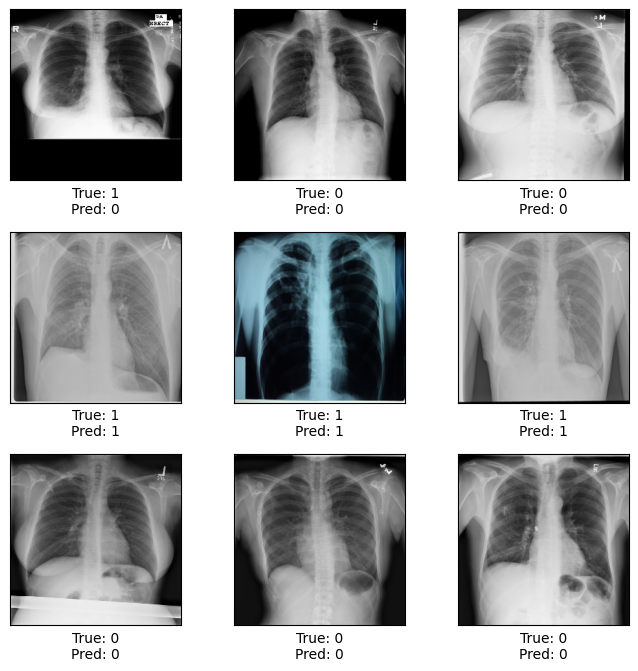

In [ ]:
def plot_images(images, labels_true, labels_pred=None):
    assert len(images) == len(labels_true) == 9

    # Create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i])

        # Show true & predicted labels
        if labels_pred is None:
            xlabel = f'True: {labels_true[i]}'
        else:
            xlabel = f'True: {labels_true[i]}\nPred: {labels_pred[i]}'

        # Show the classes as the label on the x-axis
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Select a few images from the test set
num_images = 9
indices = np.random.choice(len(X_test), num_images, replace=False)
images = X_test[indices].reshape(num_images, IMG_HEIGHT, IMG_WIDTH, 3)
labels_true = y_test[indices]
labels_pred = y_pred[indices]

# Plot the images
plot_images(images, labels_true, labels_pred)

**Inteprating ROC Curve:**

The False Positive Rate is represented by the X-Axis (FPR).
The True Positive Rate is shown by the Y-Axis (TPR).
A distinct threshold for classifying the data points is represented by each point on the ROC curve. The TPR and FPR will fluctuate when the threshold is changed, tracing the ROC curve.

How to Interpret the Random Classifier's (ROC) Curve Diagonal Line: A random classifier is shown by the diagonal line between (0,0) and (1,1); it is incapable of differentiating between the positive and negative classifications. This line has an area of 0.5.

Above the Diagonal: The ROC curve of a strong classifier will bend in the direction of the upper-left corner of the plot. A perfect classifier is represented by an AUC of 1.0, which falls between 0.5 and 1.0.

Below the Diagonal: The classifier performs worse than random guessing if the ROC curve is below the diagonal.

AUC, or area under the curve.

The classifier's performance is summarized by a single scalar value called the AUC:


*   Perfect classifier: AUC = 1.
*   Good classifier: 0.5 < AUC < 1; the closer to 1, the better.When the AUC is 0.5, there is no discriminative power and guesswork is the same.
*   AUC < 0.5: Indicates that the classifier is misclassifying, which is worse than relying solely on guesswork.



The Algorithm's Explained via the ROC Curve
Limitation Self-reliance: The ROC curve offers a thorough understanding of the behavior of the model by displaying the classifier's performance over all feasible thresholds.

Specificity vs. Sensitivity Exchange: It facilitates comprehension of the trade-off between specificity (1 - FPR) and sensitivity (recall). greater FPRs are frequently attained at the expense of greater TPRs, and vice versa.
Comparing Models: You may compare the performance of several models both numerically and graphically by comparing their ROC curves. The model whose curve is more in line with the upper-left corner.


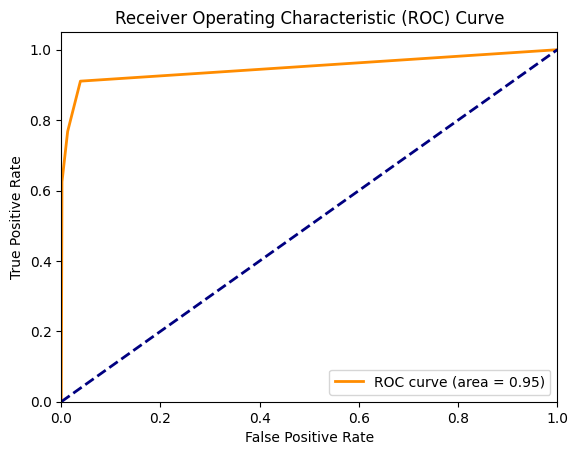

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()